In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd
import math 
# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Modelling Helpers
from sklearn.preprocessing import Normalizer , scale
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

In [3]:
df = pd.read_csv("total.csv")

In [4]:
df.head()

,timestamp,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,1523025126,Assam,Barpeta,Bohorihat,Black Gram (Urd Beans),Black Gram (Whole),06/04/2018,2800.0,3000.0,2900.0
1,1523025126,Assam,Barpeta,Bohorihat,Corriander seed,Coriander Seed,06/04/2018,3500.0,4000.0,3825.0
2,1523025126,Assam,Barpeta,Bohorihat,Jute,TD-5,06/04/2018,3200.0,3875.0,3825.0
3,1523025126,Assam,Barpeta,Bohorihat,Lentil(Masur),Masoor Gola,06/04/2018,3400.0,3600.0,3500.0
4,1523025126,Assam,Barpeta,Bohorihat,Mustard,Mustard,06/04/2018,3550.0,3650.0,3600.0


In [5]:
df.describe()

,timestamp,min_price,max_price,modal_price
count,7.418000e+03,7418.000000,7418.000000,7418.000000
mean,1.523025e+09,2551.547816,2999.163084,2804.140783
std,4.987461e-01,3563.042575,4199.273121,3917.043677
min,1.523025e+09,0.000000,0.000000,0.410000
25%,1.523025e+09,900.000000,1100.000000,1000.000000
50%,1.523025e+09,1650.000000,2000.000000,1828.500000
75%,1.523025e+09,3200.000000,3650.000000,3500.000000
max,1.523025e+09,95000.000000,110000.000000,100000.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7418 entries, 0 to 7417
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     7418 non-null   int64  
 1   state         7418 non-null   object 
 2   district      7418 non-null   object 
 3   market        7418 non-null   object 
 4   commodity     7418 non-null   object 
 5   variety       7418 non-null   object 
 6   arrival_date  7418 non-null   object 
 7   min_price     7418 non-null   float64
 8   max_price     7418 non-null   float64
 9   modal_price   7418 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 579.7+ KB


In [7]:
df.shape

(7418, 10)

In [8]:
df.columns

Index(['timestamp', 'state', 'district', 'market', 'commodity', 'variety',
       'arrival_date', 'min_price', 'max_price', 'modal_price'],
      dtype='object')

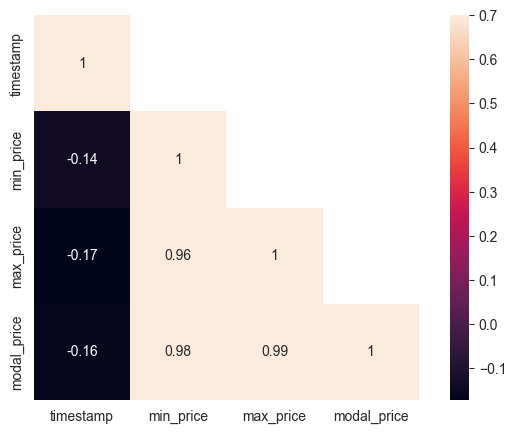

In [13]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_map = numeric_df.corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig,ax= plt.subplots()
fig.set_size_inches(8,5)
sns.heatmap(correlation_map, mask=obj,vmax=.7, square=True,annot=True)
fig.savefig("1.png") 
plt.show()

In [14]:
df.state.unique()

array(['Assam', 'Chattisgarh', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'NCT of Delhi', 'Orissa',
       'Pondicherry', 'Punjab', 'Rajasthan', 'Tamil Nadu', 'Telangana',
       'Tripura', 'Uttar Pradesh', 'Uttrakhand', 'West Bengal'],
      dtype=object)

In [15]:
df.state.nunique()

22

In [16]:
df.district.nunique()

348

In [17]:
df.district.unique()

array(['Barpeta', 'Dhemaji', 'Kamrup', 'Nagaon', 'Nalbari', 'Sonitpur',
       'Bastar', 'Bilaspur', 'Durg', 'Janjgir', 'Mahasamund',
       'North Bastar', 'Rajnandgaon', 'Surguja', 'Ahmedabad', 'Amreli',
       'Anand', 'Banaskanth', 'Bharuch', 'Bhavnagar', 'Dahod',
       'Gandhinagar', 'Jamnagar', 'Junagarh', 'Kheda', 'Mehsana', 'Morbi',
       'Panchmahals', 'Patan', 'Porbandar', 'Rajkot', 'Sabarkantha',
       'Surat', 'Surendranagar', 'Vadodara(Baroda)', 'Valsad', 'Ambala',
       'Bhiwani', 'Faridabad', 'Fatehabad', 'Jind', 'Kaithal', 'Karnal',
       'Kurukshetra', 'Mahendragarh-Narnaul', 'Panchkula', 'Rohtak',
       'Sirsa', 'Sonipat', 'Yamuna Nagar', 'Chamba', 'Hamirpur', 'Kangra',
       'Kullu', 'Mandi', 'Shimla', 'Sirmore', 'Solan', 'Una', 'Bokaro',
       'Dhanbad', 'East Singhbhum', 'Garhwa', 'Giridih', 'Godda', 'Gumla',
       'Koderma', 'Lohardaga', 'Pakur', 'Ranchi', 'Simdega', 'Bagalkot',
       'Bangalore', 'Belgaum', 'Bellary', 'Bidar', 'Bijapur',
       'Chamraj

In [18]:
df.market.nunique()

990

In [19]:
df.commodity.nunique()

192

In [20]:
df.commodity.unique()

array(['Black Gram (Urd Beans)', 'Corriander seed', 'Jute',
       'Lentil(Masur)', 'Mustard', 'Potato', 'Wheat Atta', 'Maida Atta',
       'Green Chilli', 'Green Gram Dal (Moong Dal)', 'Paddy(Dhan)',
       'Bengal Gram(Gram)', 'Lak(Teora)', 'Onion', 'Tomato', 'Tinda',
       'Mahua', 'Bhindi(Ladies Finger)', 'Lemon', 'Maize', 'Bottle gourd',
       'Brinjal', 'Carrot', 'Methi(Leaves)', 'Cotton',
       'Bajra(Pearl Millet/Cumbu)', 'Castor Seed', 'Chili Red',
       'Cummin Seed(Jeera)', 'Jowar(Sorghum)', 'Methi Seeds',
       'Sesamum(Sesame,Gingelly,Til)', 'Wheat', 'Suva (Dill Seed)',
       'Rajgir', 'Soanf', 'Guar Seed(Cluster Beans Seed)',
       'Coriander(Leaves)', 'Ginger(Green)', 'Groundnut',
       'Arhar (Tur/Red Gram)', 'Beans', 'Soyabean', 'Barley (Jau)',
       'Green Gram (Moong)', 'Groundnut (Split)', 'Isabgul (Psyllium)',
       'Kulthi(Horse Gram)', 'Ground Nut Seed', 'Garlic', 'Cluster beans',
       'Cauliflower', 'Cucumbar(Kheera)', 'Pumpkin', 'Apple',
       'Bit

In [21]:
df.variety.nunique()

337

In [22]:
df.columns

Index(['timestamp', 'state', 'district', 'market', 'commodity', 'variety',
       'arrival_date', 'min_price', 'max_price', 'modal_price'],
      dtype='object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7418 entries, 0 to 7417
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     7418 non-null   int64  
 1   state         7418 non-null   object 
 2   district      7418 non-null   object 
 3   market        7418 non-null   object 
 4   commodity     7418 non-null   object 
 5   variety       7418 non-null   object 
 6   arrival_date  7418 non-null   object 
 7   min_price     7418 non-null   float64
 8   max_price     7418 non-null   float64
 9   modal_price   7418 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 579.7+ KB


In [24]:
df.info

<bound method DataFrame.info of        timestamp        state        district     market  \
0     1523025126        Assam         Barpeta  Bohorihat   
1     1523025126        Assam         Barpeta  Bohorihat   
2     1523025126        Assam         Barpeta  Bohorihat   
3     1523025126        Assam         Barpeta  Bohorihat   
4     1523025126        Assam         Barpeta  Bohorihat   
...          ...          ...             ...        ...   
7413  1523025127  West Bengal  Uttar Dinajpur   Islampur   
7414  1523025127  West Bengal  Uttar Dinajpur   Islampur   
7415  1523025127  West Bengal  Uttar Dinajpur   Islampur   
7416  1523025127  West Bengal  Uttar Dinajpur    Raiganj   
7417  1523025127  West Bengal  Uttar Dinajpur    Raiganj   

                   commodity             variety arrival_date  min_price  \
0     Black Gram (Urd Beans)  Black Gram (Whole)   06/04/2018     2800.0   
1            Corriander seed      Coriander Seed   06/04/2018     3500.0   
2                  

In [25]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df.select_dtypes(include=numerics)       #  numeric dataframe
objects = ['O']
df_o = df.select_dtypes(include=objects)

In [26]:
newdf.columns               #  numeric columns

Index(['timestamp', 'min_price', 'max_price', 'modal_price'], dtype='object')

In [27]:
df_o.columns                 #  categorical columns

Index(['state', 'district', 'market', 'commodity', 'variety', 'arrival_date'], dtype='object')

In [28]:
df.state.value_counts()

state
Uttar Pradesh       2343
Kerala               970
Maharashtra          676
Punjab               599
Karnataka            421
Gujarat              342
West Bengal          302
Haryana              279
Orissa               257
Telangana            245
Himachal Pradesh     239
Tamil Nadu           184
Jharkhand            130
Madhya Pradesh       123
Rajasthan            104
Uttrakhand            71
NCT of Delhi          36
Tripura               33
Chattisgarh           23
Assam                 21
Meghalaya             12
Pondicherry            8
Name: count, dtype: int64

In [29]:
df.district.value_counts()

district
Agra         139
Kottayam     137
Palakad      136
Ernakulam    124
Alappuzha    120
            ... 
Sagar          1
Koppal         1
Shravasti      1
Belgaum        1
Satna          1
Name: count, Length: 348, dtype: int64

In [30]:
df.commodity.value_counts()

commodity
Potato                  383
Onion                   353
Tomato                  340
Brinjal                 312
Wheat                   281
                       ... 
Cornation                 1
Gladiolus Cut Flower      1
Jaffri                    1
Jarbara                   1
Moath Dal                 1
Name: count, Length: 192, dtype: int64

In [31]:
pd.crosstab([df.state], [df.commodity], margins=True).style.background_gradient(cmap='autumn_r')

In [33]:
gp = df.loc[(df.state == "Karnataka") & (df.district == "Bangalore") , : ]

In [34]:
a = ""
for i in range(0 , gp.shape[0]):
    a = a + gp.commodity + "    " + gp.variety + "    " + gp.arrival_date + "    " + str(gp.min_price) + "    " + str(gp.max_price) + "    " + str(gp.modal_price) + "    "

In [35]:
a

1042    Alasande Gram    Alasande Gram    06/04/2018  ...
1043    Arhar Dal(Tur Dal)    Arhar Dal(Tur)    06/04/...
1044    Avare Dal    Avare (Whole)    06/04/2018    10...
1045    Bajra(Pearl Millet/Cumbu)    Hybrid    06/04/2...
1046    Bengal Gram Dal (Chana Dal)    Bengal Gram Dal...
                              ...                        
1116    Ridgeguard(Tori)    Ridgeguard(Tori)    06/04/...
1117    Seemebadnekai    Seemebadanekai    06/04/2018 ...
1118    Snakeguard    Snakeguard    06/04/2018    1042...
1119    Tomato    Tomato    06/04/2018    1042    5000...
1120    Water Melon    Water Melon    06/04/2018    10...
Length: 79, dtype: object

In [36]:
gp

,timestamp,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
1042,1523025126,Karnataka,Bangalore,Bangalore,Alasande Gram,Alasande Gram,06/04/2018,5000.0,5200.0,5100.0
1043,1523025126,Karnataka,Bangalore,Bangalore,Arhar Dal(Tur Dal),Arhar Dal(Tur),06/04/2018,5200.0,7100.0,6150.0
1044,1523025126,Karnataka,Bangalore,Bangalore,Avare Dal,Avare (Whole),06/04/2018,5400.0,5600.0,5500.0
1045,1523025126,Karnataka,Bangalore,Bangalore,Bajra(Pearl Millet/Cumbu),Hybrid,06/04/2018,1700.0,1900.0,1800.0
1046,1523025126,Karnataka,Bangalore,Bangalore,Bengal Gram Dal (Chana Dal),Bengal Gram Dal,06/04/2018,4800.0,5200.0,5000.0
...,...,...,...,...,...,...,...,...,...,...
1116,1523025126,Karnataka,Bangalore,Ramanagara,Ridgeguard(Tori),Ridgeguard(Tori),06/04/2018,2400.0,2800.0,2600.0
1117,1523025126,Karnataka,Bangalore,Ramanagara,Seemebadnekai,Seemebadanekai,06/04/2018,2000.0,2400.0,2200.0
1118,1523025126,Karnataka,Bangalore,Ramanagara,Snakeguard,Snakeguard,06/04/2018,1400.0,1600.0,1500.0
1119,1523025126,Karnataka,Bangalore,Ramanagara,Tomato,Tomato,06/04/2018,1000.0,1200.0,1100.0


In [44]:
def get_graphs(state , district , market):
    gp = df.loc[(df.state == state) & (df.district == district) & (df.market == market), : ]
    fig, axes = plt.subplots(5,1)
    fig.set_size_inches(20, 30)
    sns.barplot(data=gp ,y="modal_price",x="commodity", hue = "variety" ,orient="v" ,ax=axes[0] )
    sns.kdeplot(gp.modal_price , shade=True, color="r" , ax=axes[1] )
    sns.stripplot(x="commodity", y="modal_price", data=gp , hue = "variety" , jitter=True , ax = axes[2])
    sns.distplot(gp.modal_price , ax = axes[3])
    sns.pointplot(x="commodity", y="modal_price", data=gp , ax = axes[4] ) 
    fig.savefig("2.png")
    plt.show()

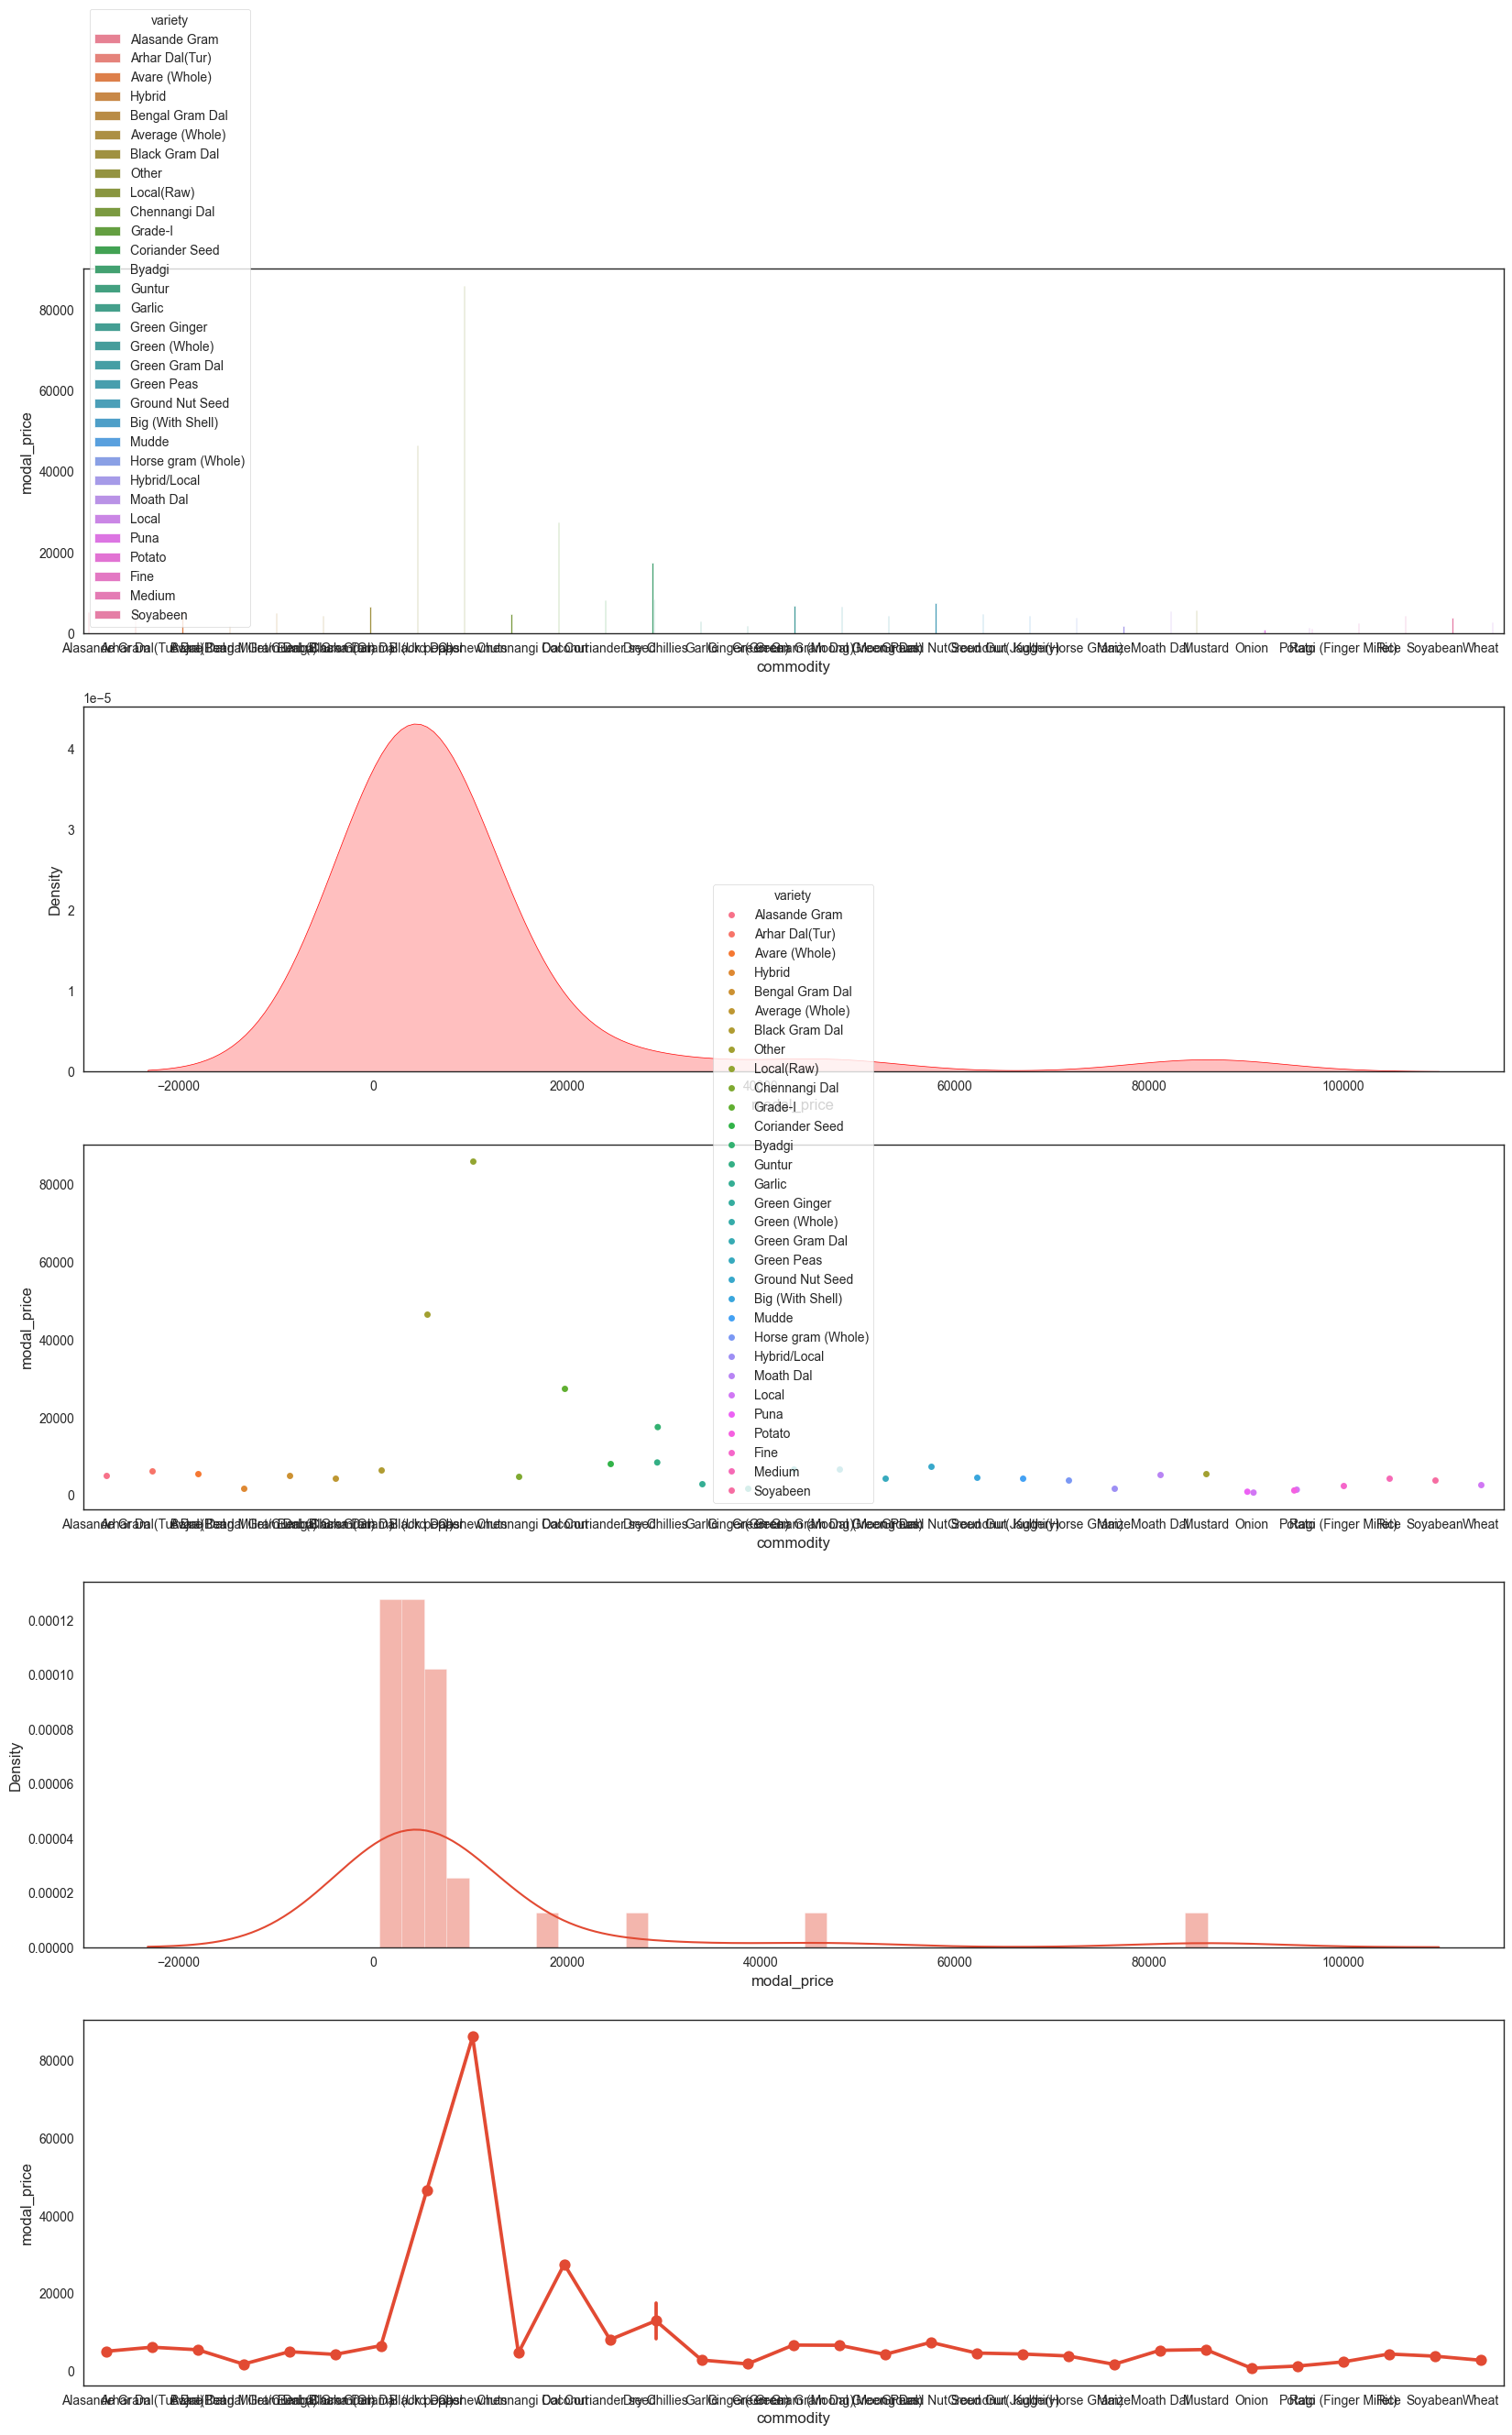

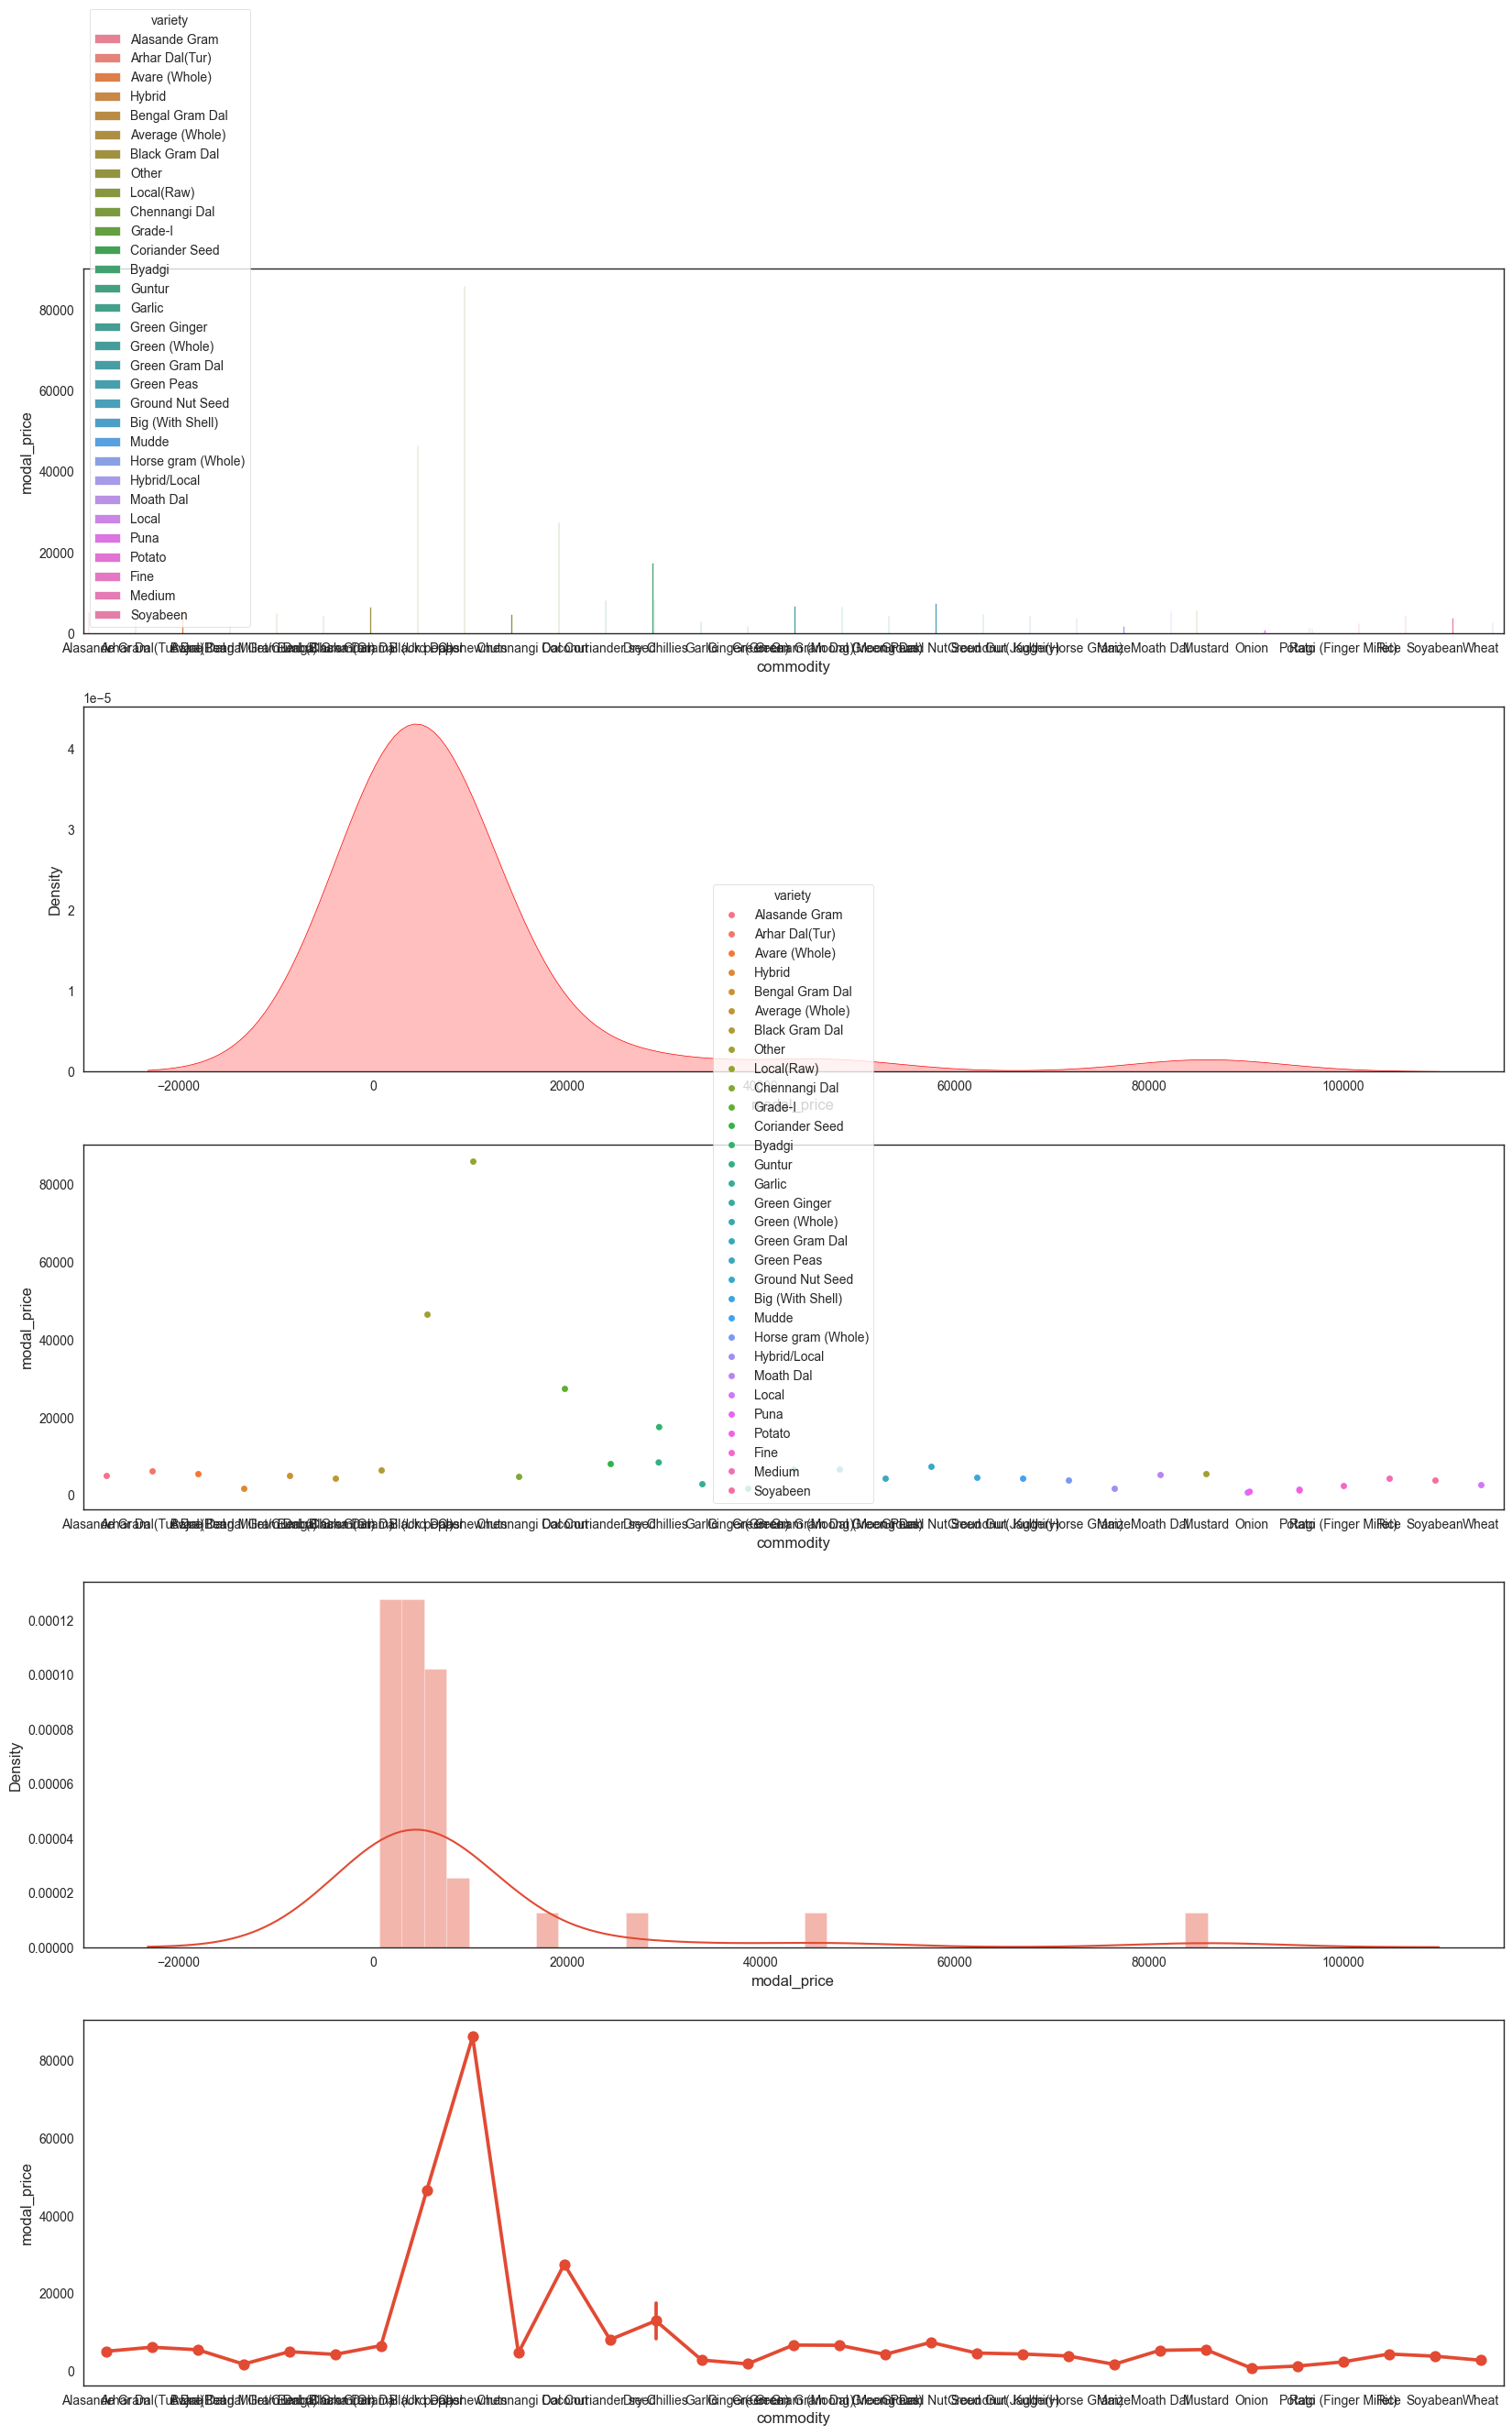

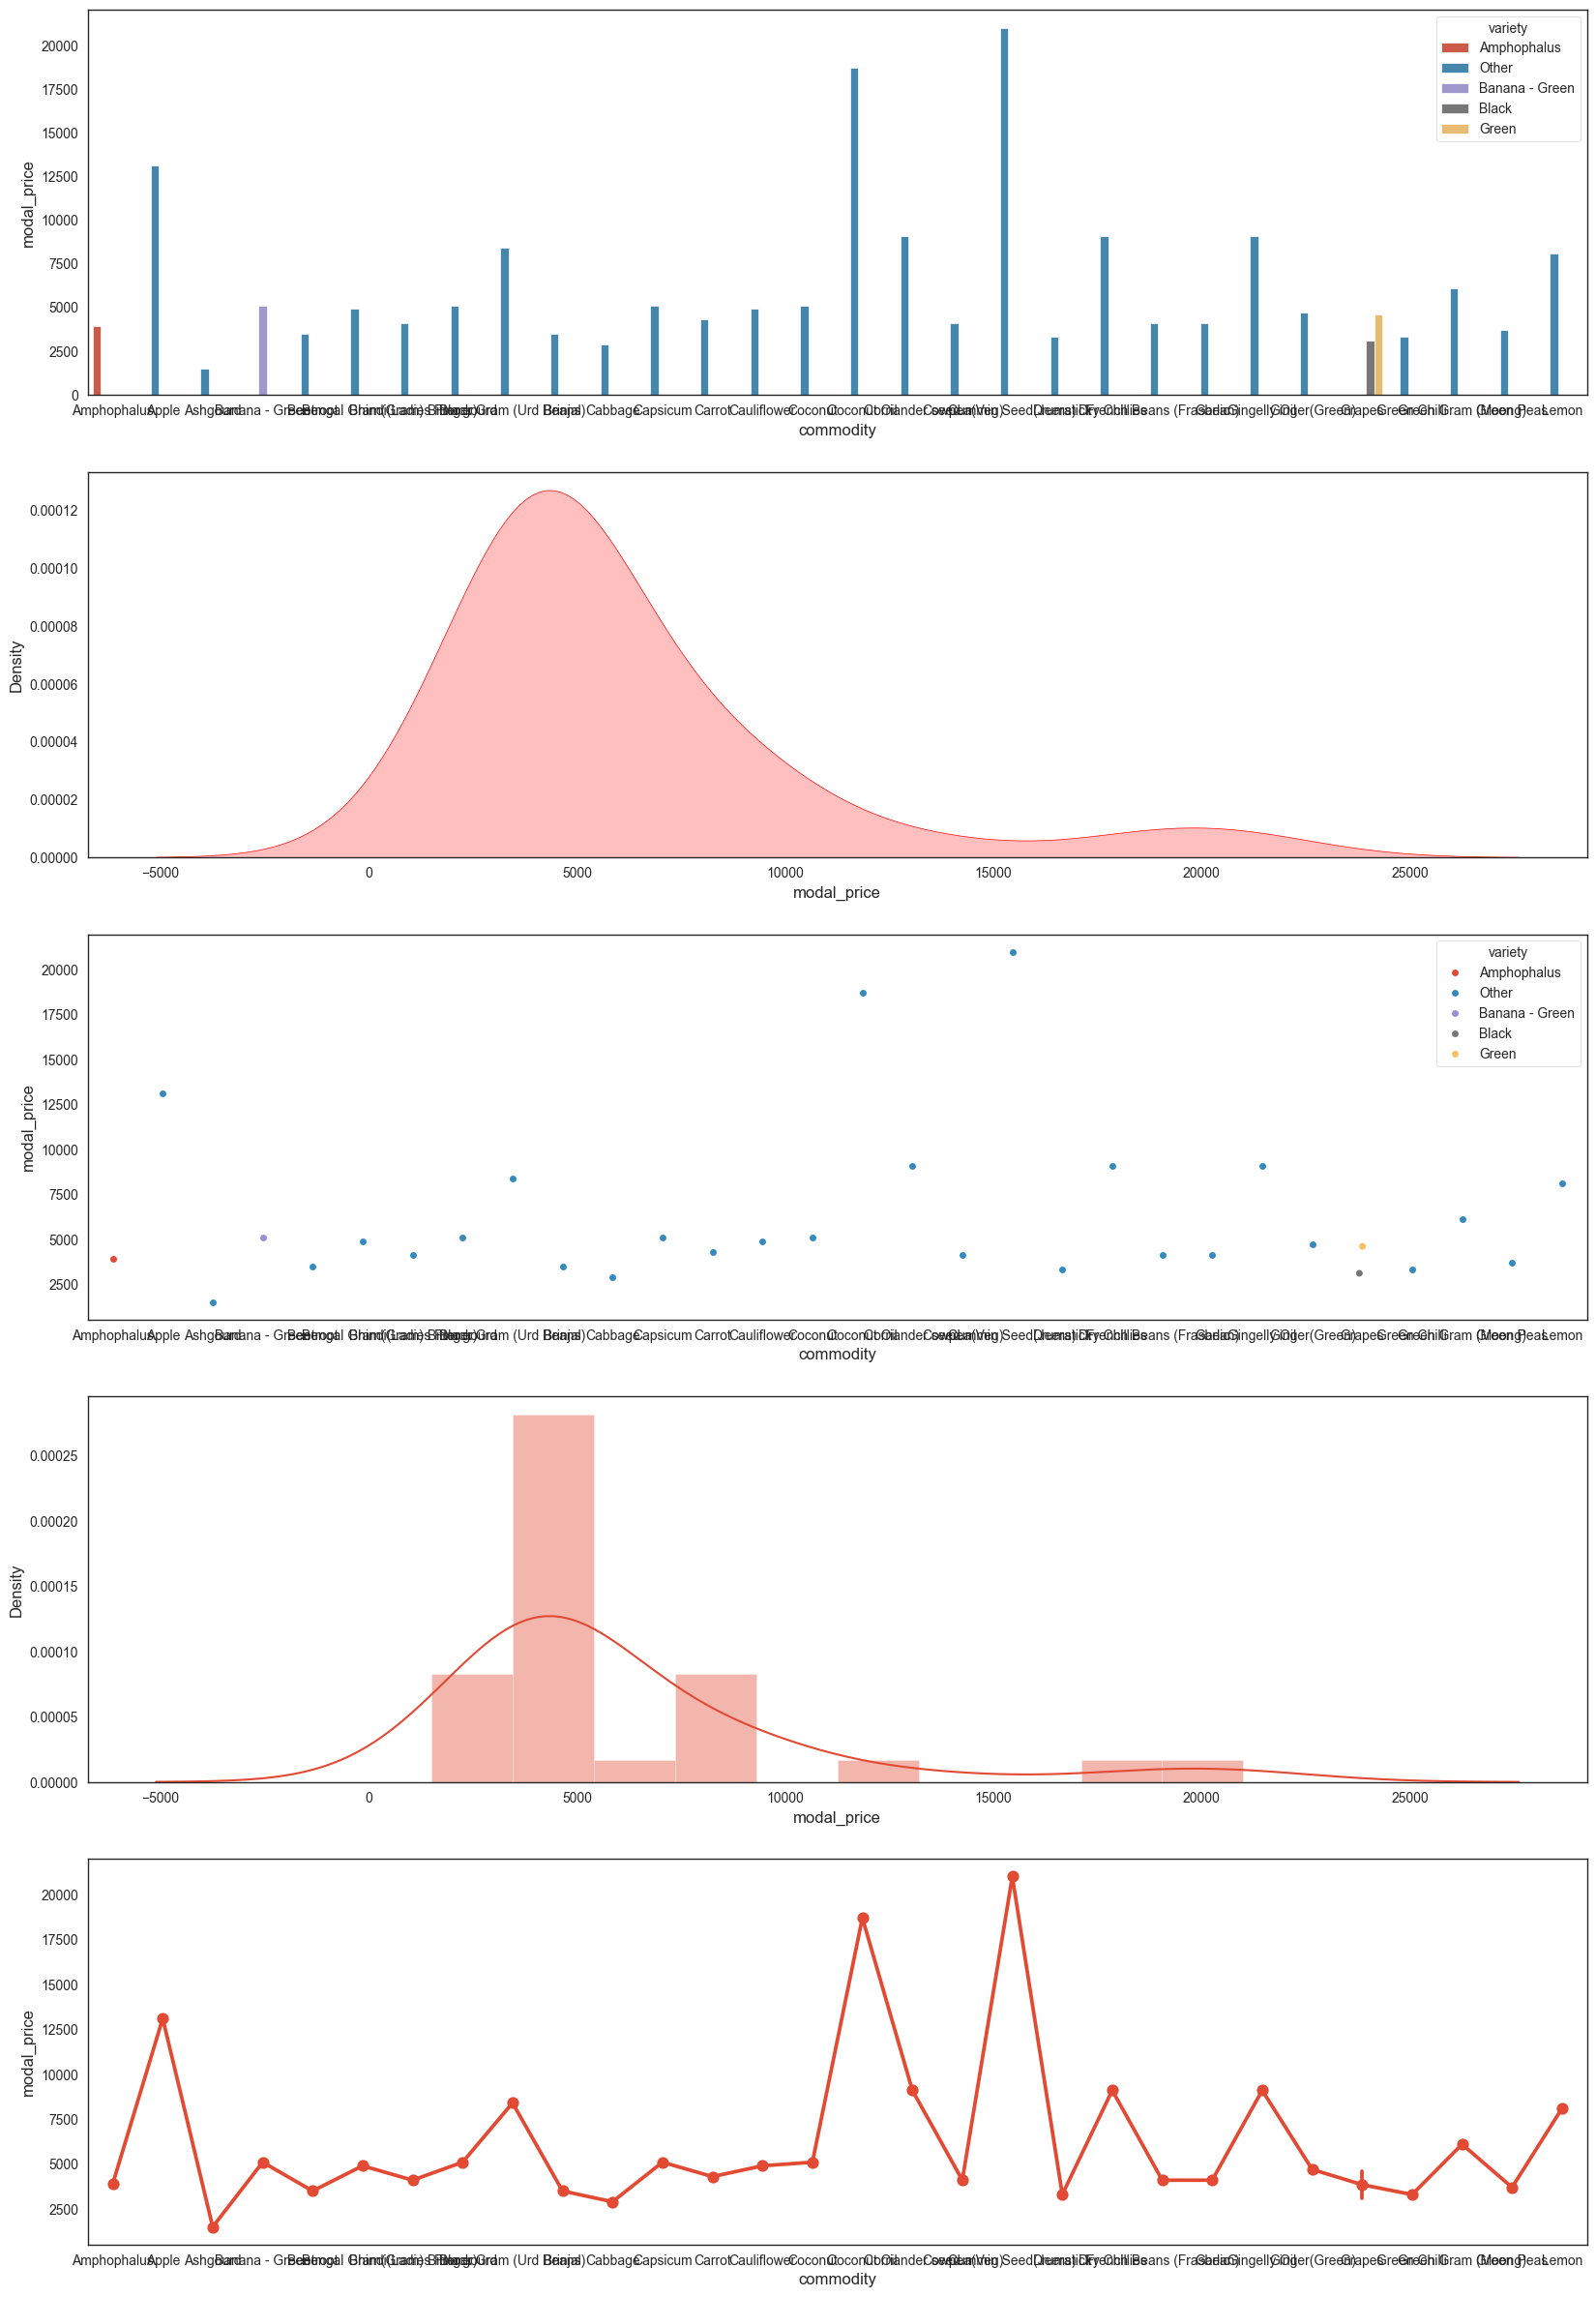

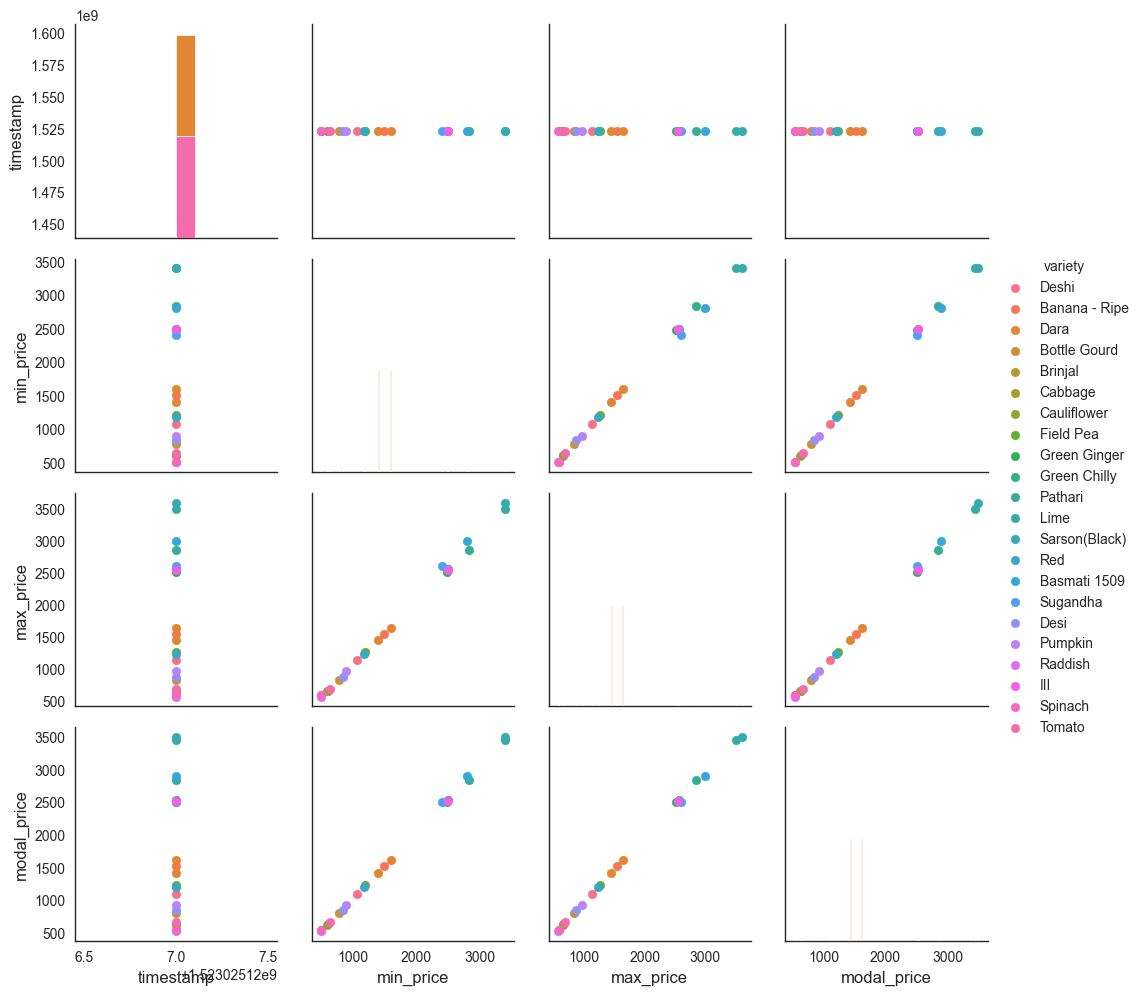

<Figure size 1500x1000 with 0 Axes>

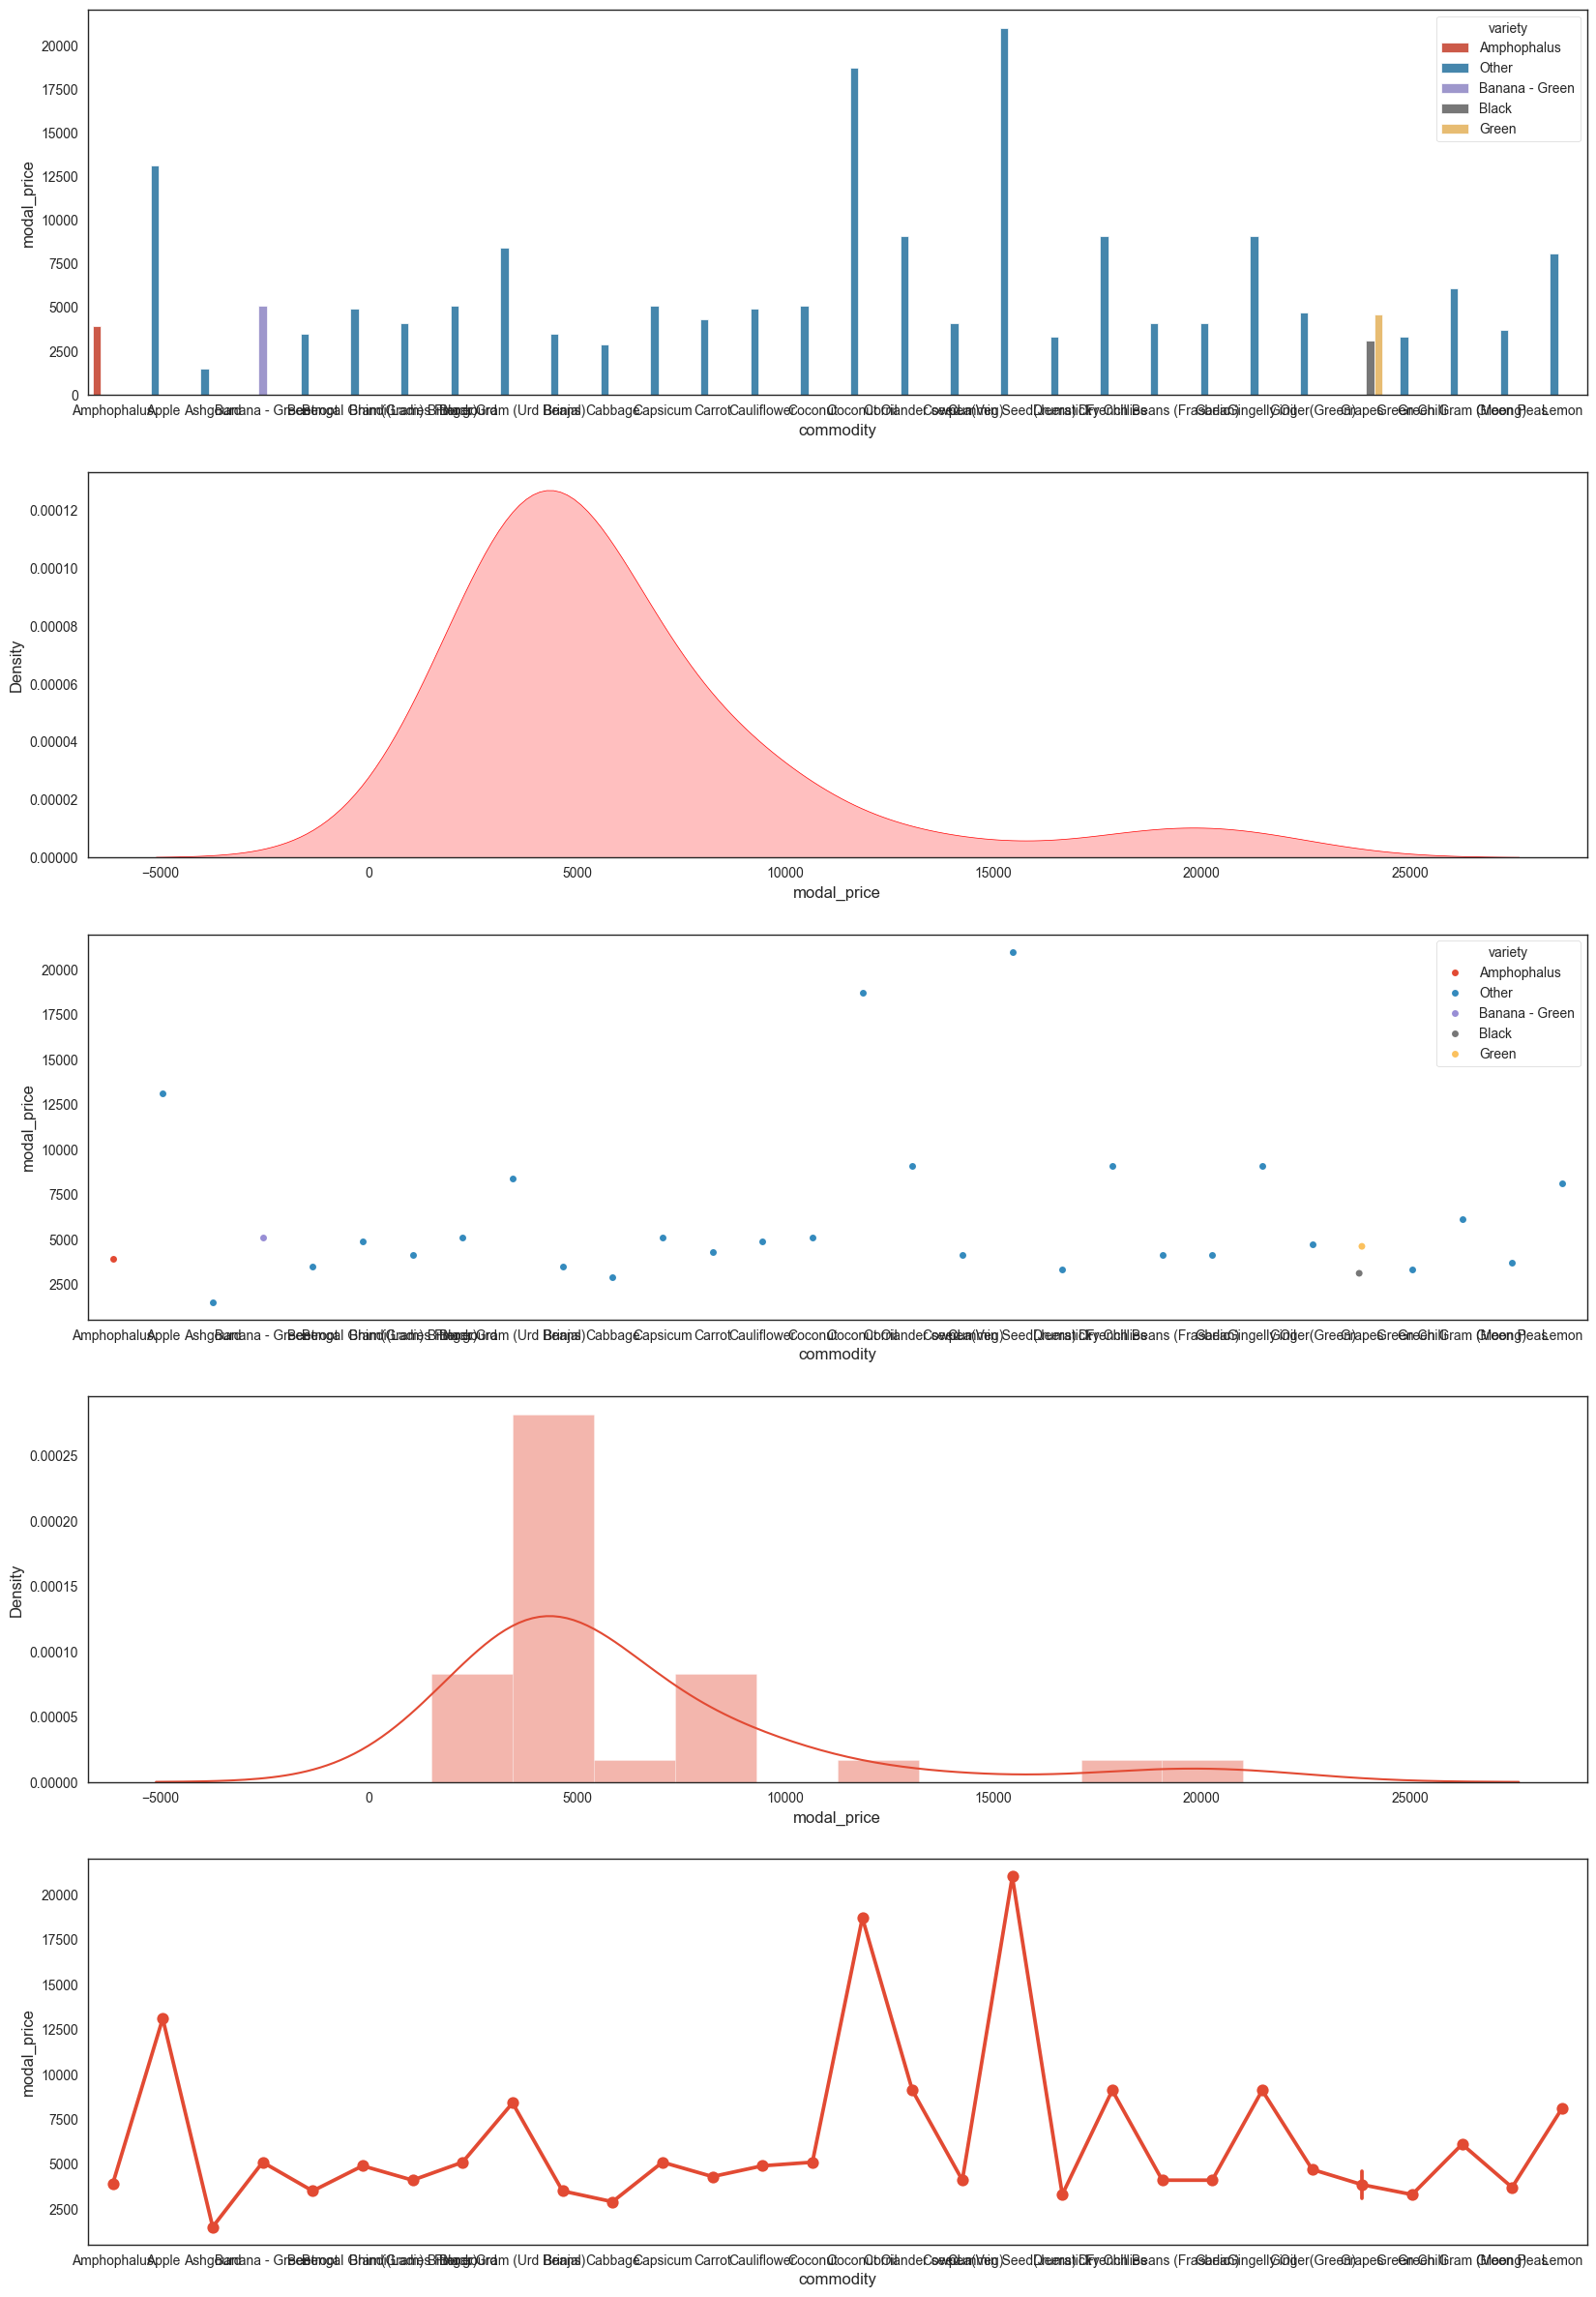

In [45]:
get_graphs("Kerala" , "Alappuzha" , "Aroor")

In [46]:
 def pairplot(state , district , market):
    gp = df.loc[(df.state == state) & (df.district == district) & (df.market == market), : ]
    g = sns.PairGrid(gp , hue = "variety")
    g = g.map_diag(plt.hist)
    g = g.map_offdiag(plt.scatter)
    g = g.add_legend()
    g = plt.figure(figsize=(15,10))
    fig.savefig("4.png")
    plt.show()

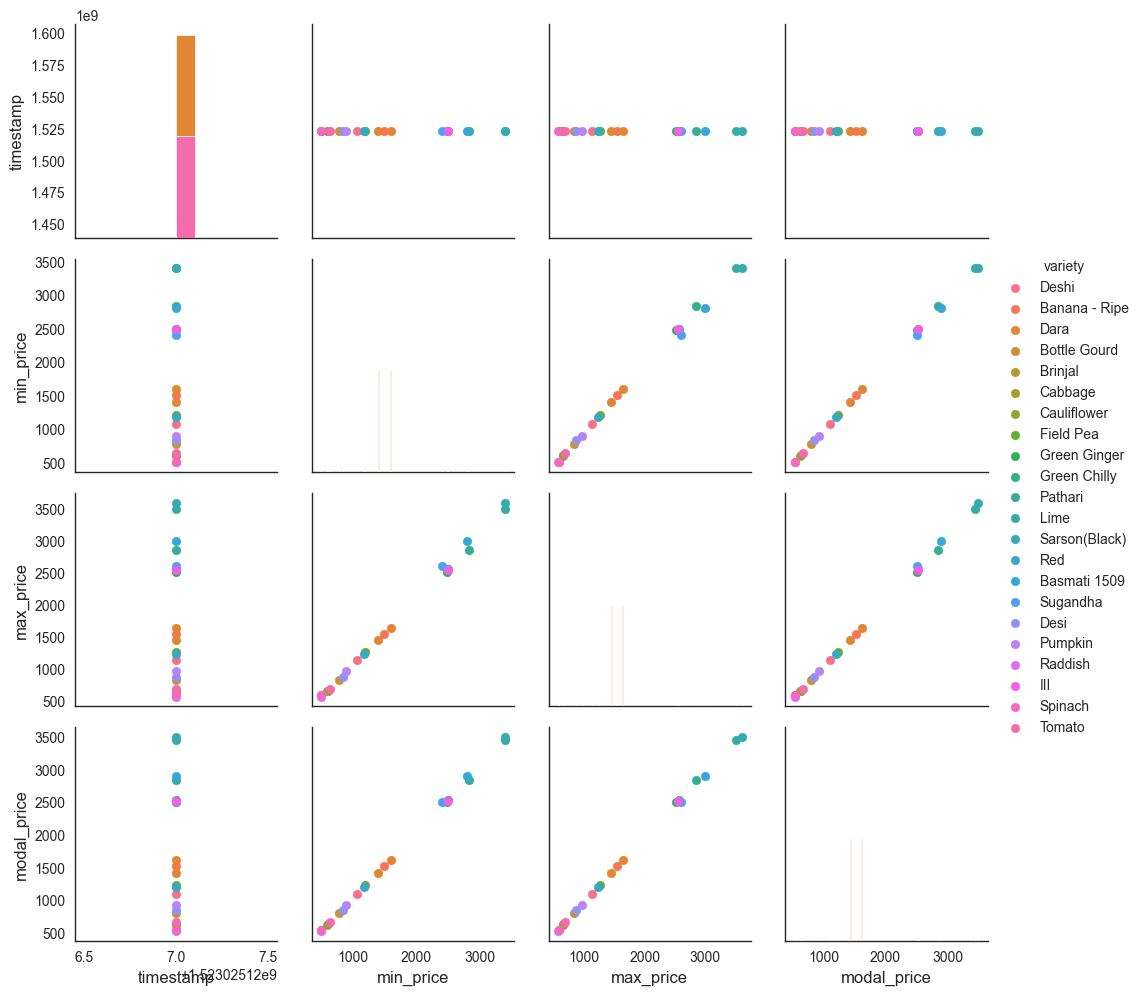

<Figure size 1500x1000 with 0 Axes>

In [47]:
pairplot("Uttar Pradesh" , "Agra" , "Achnera")

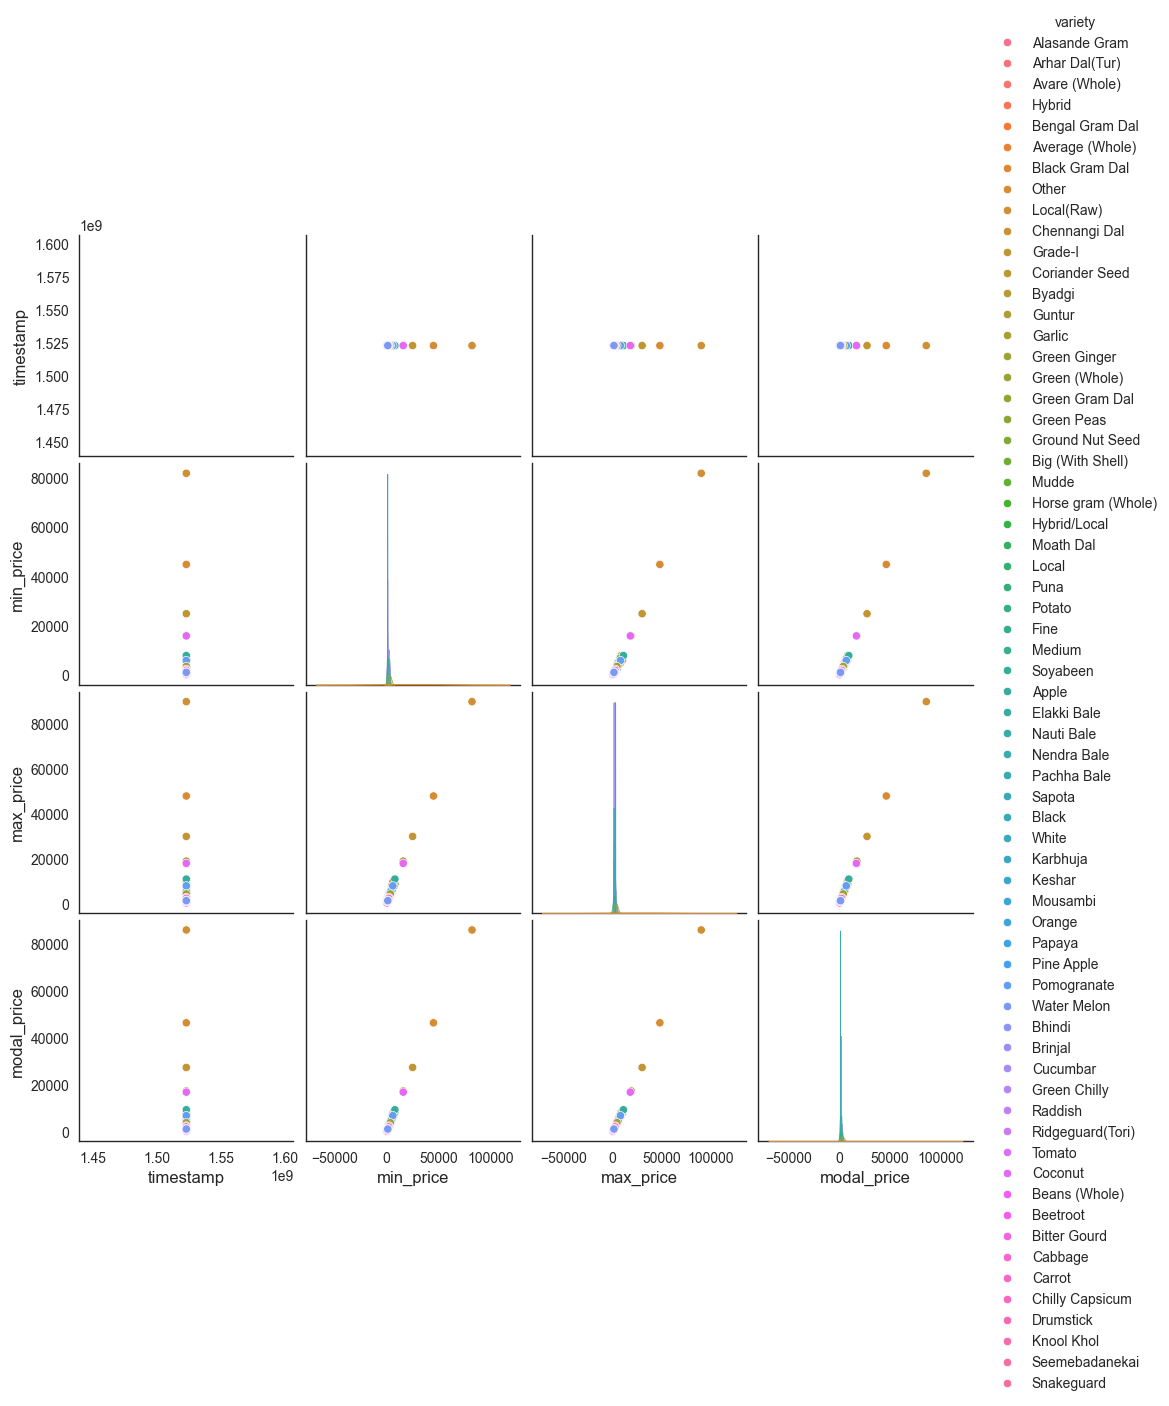

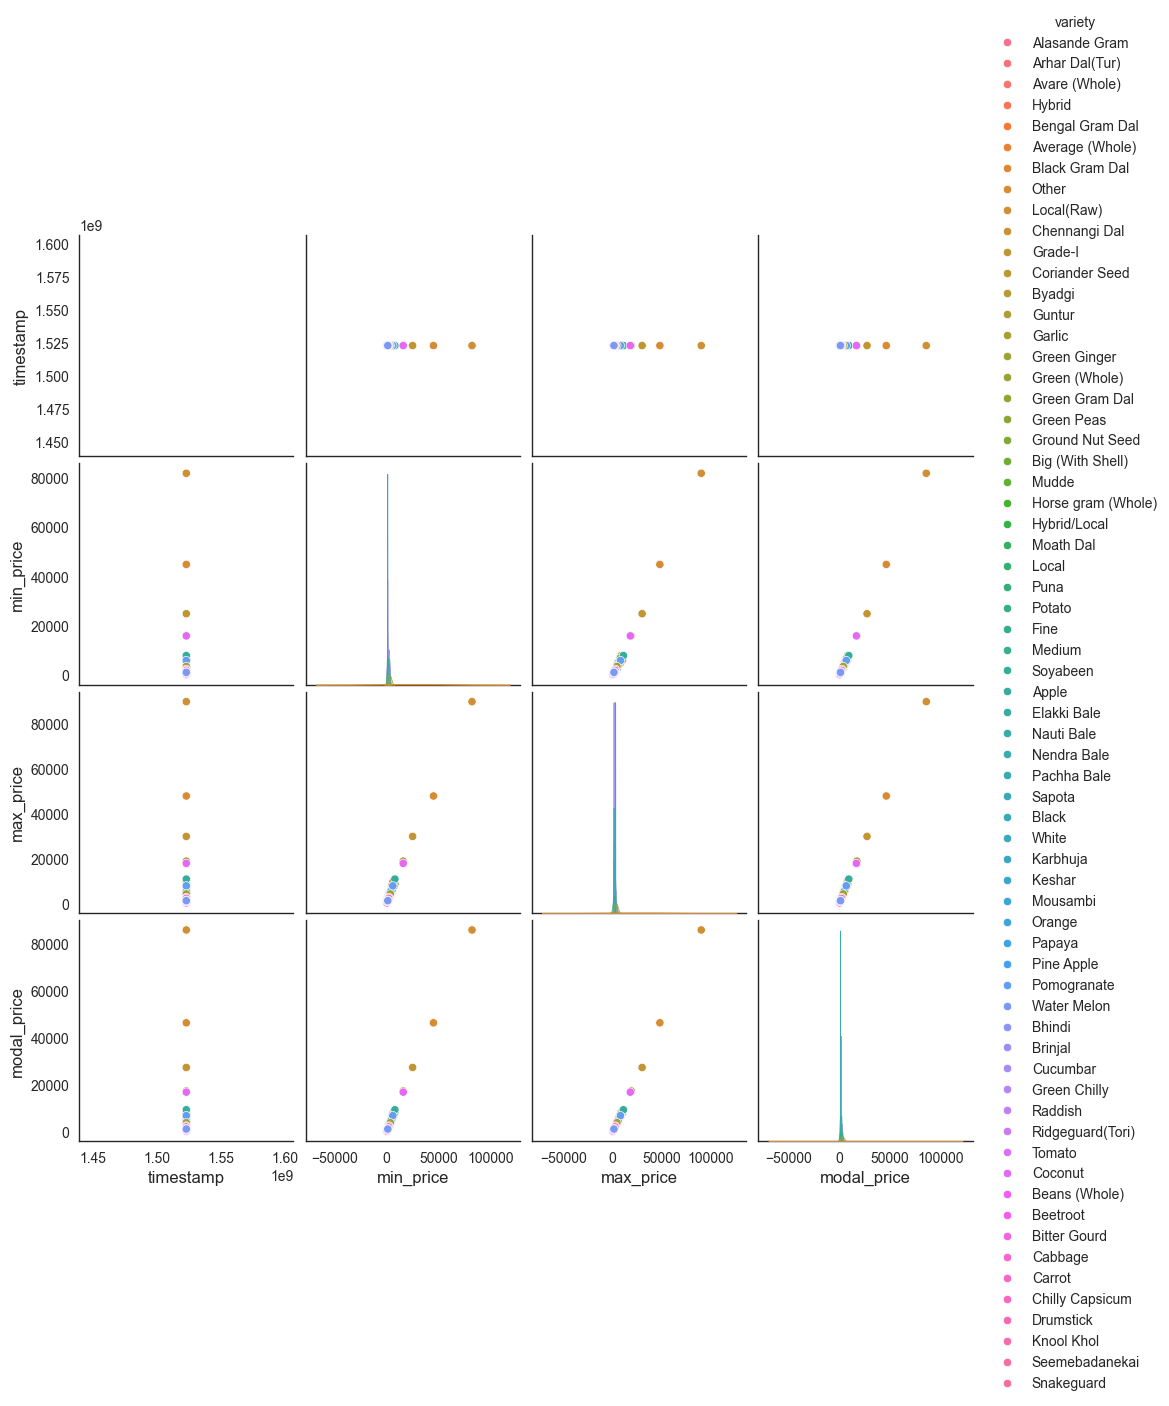

In [49]:
sns.pairplot(gp , hue = "variety")
plt.show()

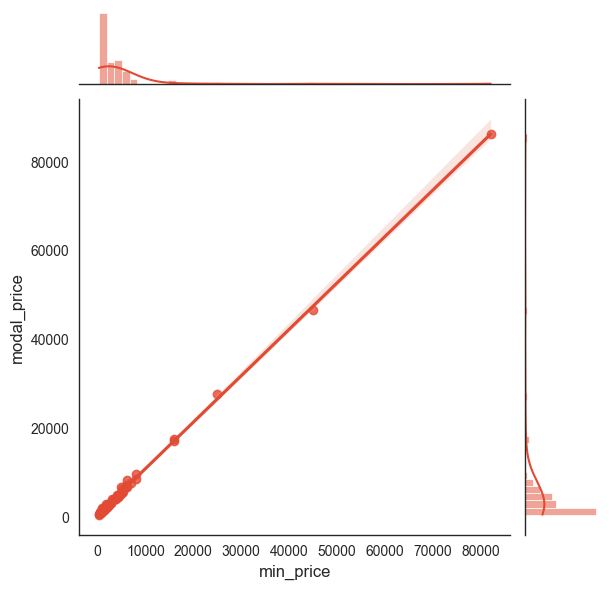

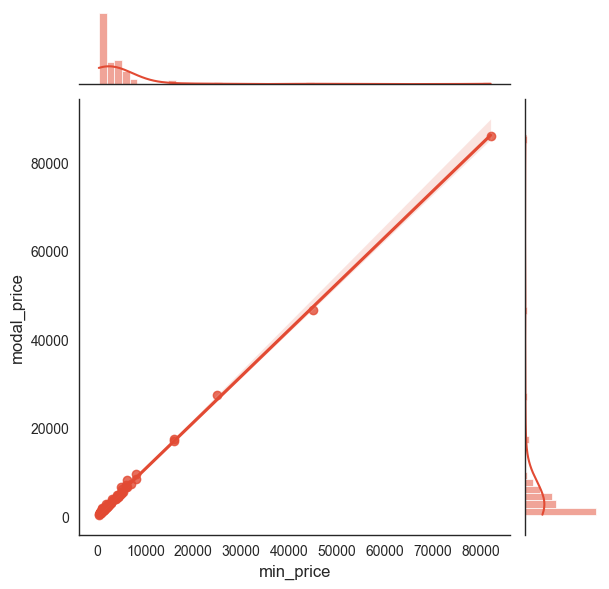

In [51]:
sns.jointplot(x="min_price", y="modal_price", data=gp , kind="reg")
plt.show()

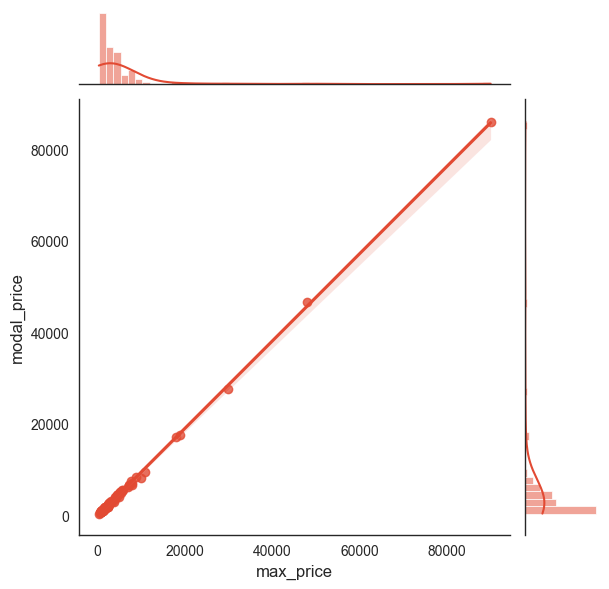

In [52]:
g = sns.jointplot(x="max_price", y="modal_price", data=gp , kind="reg")
plt.show()

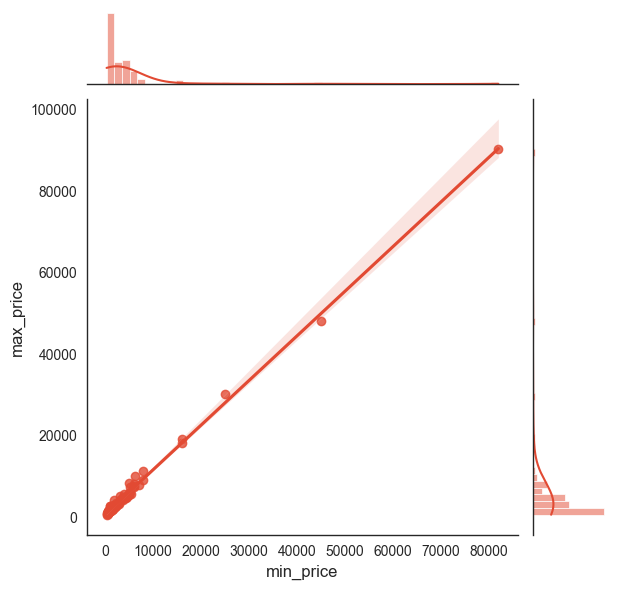

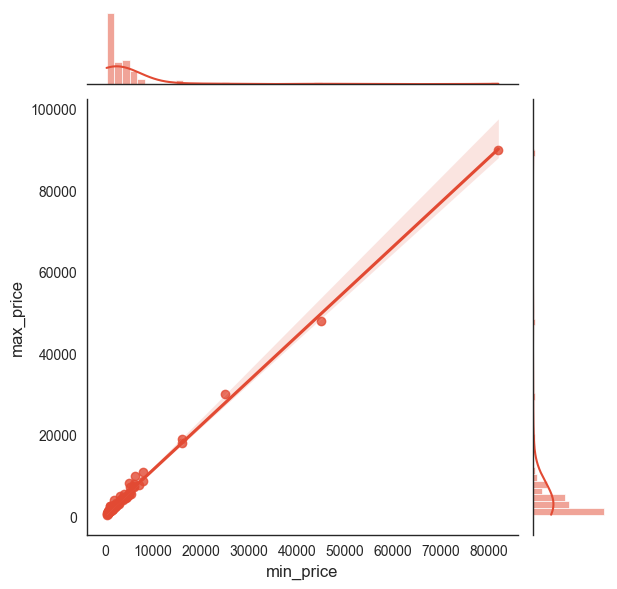

In [54]:
g = sns.jointplot(x="min_price", y="max_price", data=gp , kind="reg")
plt.show()

In [55]:
temp = df.loc[(df.state == "Karnataka") & (df.district == "Bangalore") & (df.commodity == "Potato"), : ]
temp

,timestamp,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
1070,1523025126,Karnataka,Bangalore,Bangalore,Potato,Local,06/04/2018,1200.0,1600.0,1400.0
1071,1523025126,Karnataka,Bangalore,Bangalore,Potato,Potato,06/04/2018,1100.0,1300.0,1200.0


In [59]:
def get_val(state , district , commodity):
    temp = df.loc[(df.state == state) & (df.district == district) & (df.commodity == commodity), : ]
    fig, axes = plt.subplots(6,1)
    fig.set_size_inches(20, 30)
    sns.barplot(data=temp ,y="min_price",x="market" ,orient="v" , ax = axes[0] )
    sns.pointplot(data=temp ,y="min_price",x="market" ,orient="v" , ax = axes[1] )
    #sns.stripplot(x="market", y="min_price", data=temp , jitter=True ,  ax = axes[1])
    #sns.distplot(temp.modal_price , ax = axes[3])
    sns.barplot(data=temp ,y="modal_price",x="market" ,orient="v" , ax = axes[2] )
    sns.pointplot(data=temp ,y="modal_price",x="market" ,orient="v" , ax = axes[3] )
    sns.barplot(data=temp ,y="max_price",x="market" ,orient="v" , ax = axes[4] )
    sns.pointplot(data=temp ,y="max_price",x="market" ,orient="v" , ax = axes[5] )
    fig.savefig("3.png")
    plt.show()

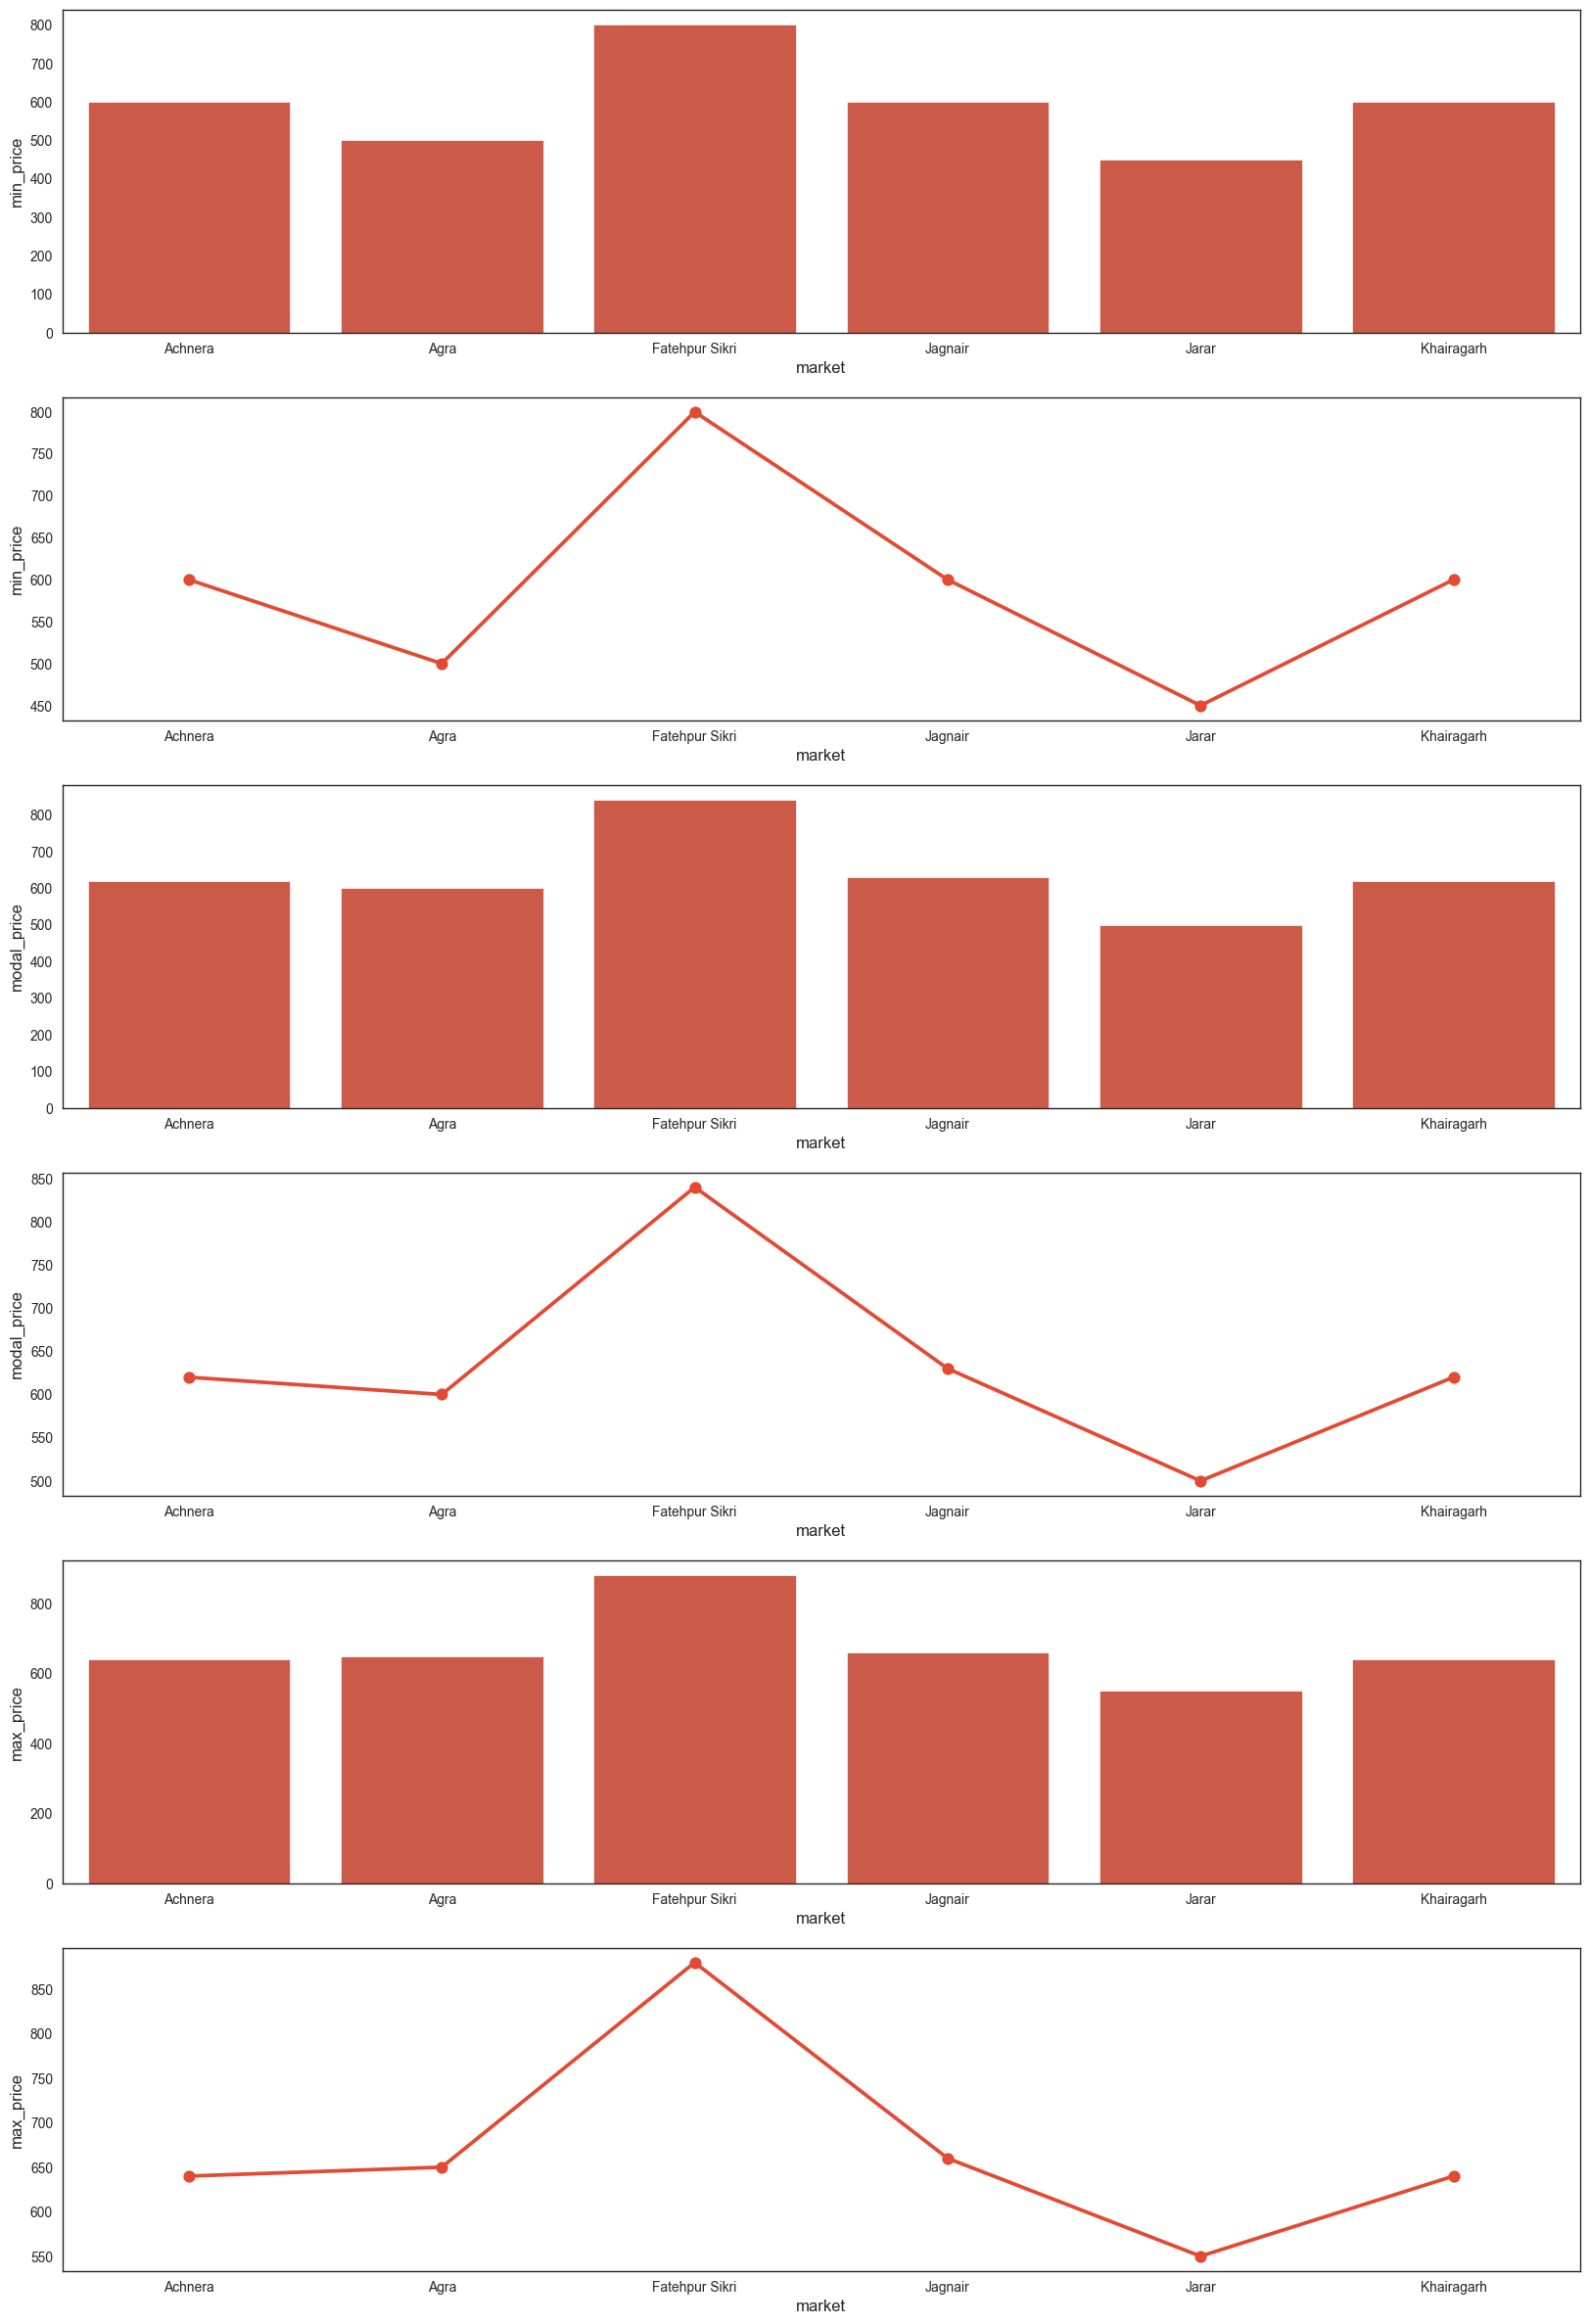

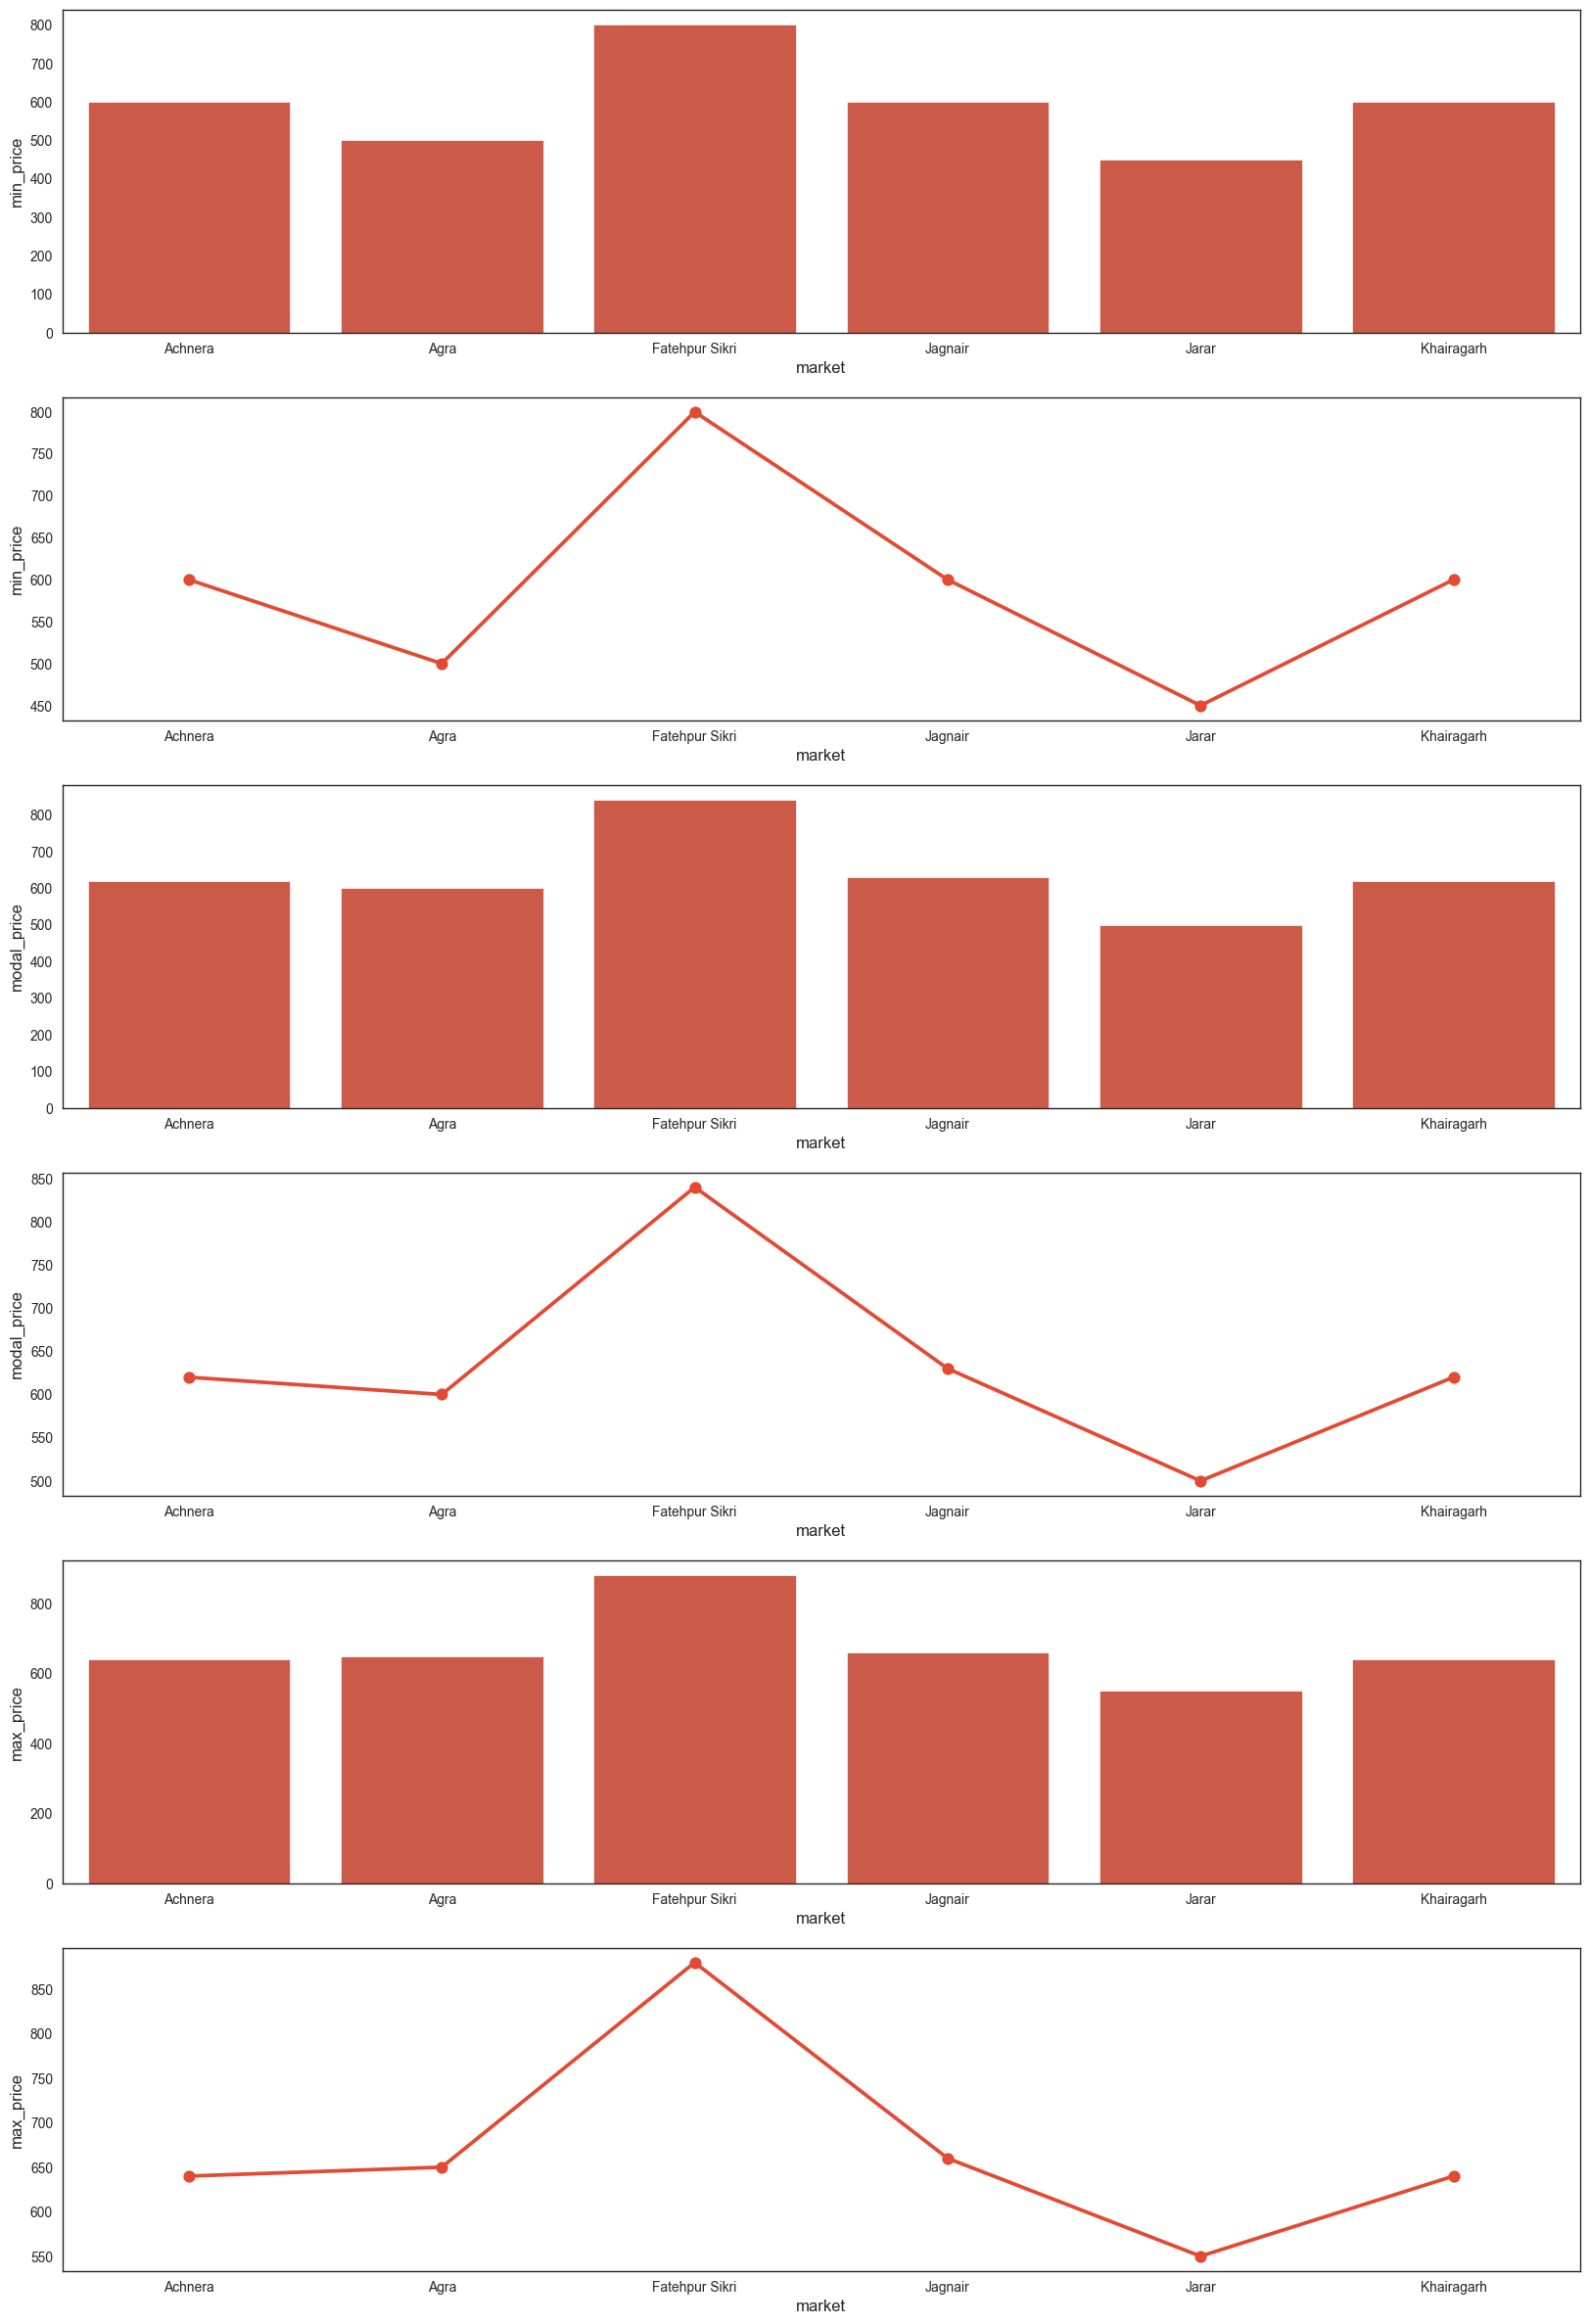

In [60]:
get_val("Uttar Pradesh" , "Agra" , "Brinjal")

In [61]:
df.head()

,timestamp,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,1523025126,Assam,Barpeta,Bohorihat,Black Gram (Urd Beans),Black Gram (Whole),06/04/2018,2800.0,3000.0,2900.0
1,1523025126,Assam,Barpeta,Bohorihat,Corriander seed,Coriander Seed,06/04/2018,3500.0,4000.0,3825.0
2,1523025126,Assam,Barpeta,Bohorihat,Jute,TD-5,06/04/2018,3200.0,3875.0,3825.0
3,1523025126,Assam,Barpeta,Bohorihat,Lentil(Masur),Masoor Gola,06/04/2018,3400.0,3600.0,3500.0
4,1523025126,Assam,Barpeta,Bohorihat,Mustard,Mustard,06/04/2018,3550.0,3650.0,3600.0


In [64]:
numeric_columns = df.select_dtypes(include='number')
result = df.groupby(['state', 'commodity'])[numeric_columns.columns].mean()
print(result)

                                           timestamp    min_price  \
state       commodity                                               
Assam       Black Gram (Urd Beans)      1.523025e+09  2800.000000   
            Corriander seed             1.523025e+09  3500.000000   
            Green Chilli                1.523025e+09  1500.000000   
            Green Gram Dal (Moong Dal)  1.523025e+09  6200.000000   
            Jute                        1.523025e+09  3266.666667   
...                                              ...          ...   
West Bengal Ridgeguard(Tori)            1.523025e+09  2500.000000   
            Sugar                       1.523025e+09  3700.000000   
            Sweet Pumpkin               1.523025e+09   842.857143   
            Tomato                      1.523025e+09   633.888889   
            Wheat                       1.523025e+09  1626.250000   

                                          max_price  modal_price  
state       commodity              